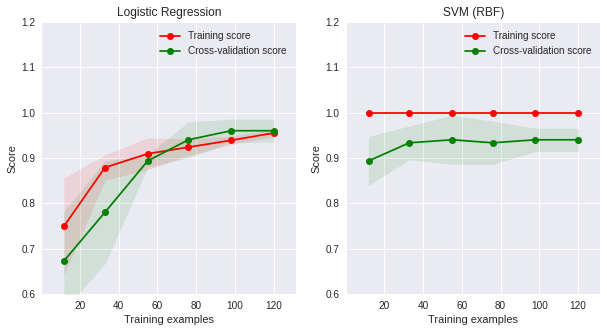

In [1]:
#!/usr/bin/env python

"""

plot inspired by 
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
"""



import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris, load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
plt.style.use('seaborn')

def plot_learning_curve(estimator, ax=None, save_as=None, cv=5):
    """
    an sklearn estimator 
    """

    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    train_sizes=np.linspace(.1, 1.0, 6)
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y,
                                                            cv=cv, n_jobs=-1,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ## axes and lables
    buff = 0.05
    xmin,xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    xbuff = buff * (xmax - xmin)
    ybuff = buff * (ymax - ymin)
    ax.set_xlim(xmin-xbuff,xmax+xbuff)
    ax.set_ylim(ymin-ybuff,ymax+ybuff)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    
    ax.legend(loc="best")
    
    ## save figure if file name provided
    if save_as:
        plt.savefig(save_as)

        
if __name__ == "__main__":

    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    
    np.random.seed(0)
    iris = load_iris()
    X, y = iris.data, iris.target

    indices = np.arange(y.shape[0])
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]

    model1 = LogisticRegression(penalty='l2', C=0.1, multi_class='auto')
    plot_learning_curve(model1, ax=ax1)

    model2 = SVC(kernel='rbf', C=1000.0, gamma=0.99)
    plot_learning_curve(model2, ax=ax2)

    ax1.set_title("Logistic Regression")
    ax2.set_title("SVM (RBF)")

    for ax in [ax1,ax2]:
        ax.set_ylim((0.6,1.2))
    
    plt.show()
